In [1]:
from google.colab import files
uploaded = files.upload()

Saving fer2013.csv to fer2013.csv


In [2]:
import numpy as np
import pandas as pd 
from PIL import Image
from tqdm import tqdm
import os

In [3]:
outer_names = ['test','train']
inner_names = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
os.makedirs('data', exist_ok=True)
for outer_name in outer_names:
    os.makedirs(os.path.join('data',outer_name), exist_ok=True)
    for inner_name in inner_names:
        os.makedirs(os.path.join('data',outer_name,inner_name), exist_ok=True)


In [4]:
angry = 0
disgusted = 0
fearful = 0
happy = 0
sad = 0
surprised = 0
neutral = 0
angry_test = 0
disgusted_test = 0
fearful_test = 0
happy_test = 0
sad_test = 0
surprised_test = 0
neutral_test = 0

df = pd.read_csv('/content/fer2013.csv')
mat = np.zeros((48,48),dtype=np.uint8)
print("Saving images...")

Saving images...


In [5]:
def atoi(s):
    n = 0
    for i in s:
        n = n*10 + ord(i) - ord("0")
    return n

In [8]:
for i in tqdm(range(len(df))):
    txt = df['pixels'][i]
    words = txt.split()
    
    for j in range(2304):
        xind = j // 48
        yind = j % 48
        mat[xind][yind] = atoi(words[j])

    img = Image.fromarray(mat)

    # train
    if i < 28709:
        if df['emotion'][i] == 0:
            img.save('/content/data/train/angry/im'+str(angry)+'.png')
            angry += 1
        elif df['emotion'][i] == 1:
            img.save('/content/data/train/disgusted/im'+str(disgusted)+'.png')
            disgusted += 1
        elif df['emotion'][i] == 2:
            img.save('/content/data/train/fearful/im'+str(fearful)+'.png')
            fearful += 1
        elif df['emotion'][i] == 3:
            img.save('/content/data/train/happy/im'+str(happy)+'.png')
            happy += 1
        elif df['emotion'][i] == 4:
            img.save('/content/data/train/sad/im'+str(sad)+'.png')
            sad += 1
        elif df['emotion'][i] == 5:
            img.save('/content/data/train/surprised/im'+str(surprised)+'.png')
            surprised += 1
        elif df['emotion'][i] == 6:
            img.save('/content/data/train/neutral/im'+str(neutral)+'.png')
            neutral += 1

    # test
    else:
        if df['emotion'][i] == 0:
            img.save('/content/data/test/angry/im'+str(angry_test)+'.png')
            angry_test += 1
        elif df['emotion'][i] == 1:
            img.save('/content/data/test/disgusted/im'+str(disgusted_test)+'.png')
            disgusted_test += 1
        elif df['emotion'][i] == 2:
            img.save('/content/data/test/fearful/im'+str(fearful_test)+'.png')
            fearful_test += 1
        elif df['emotion'][i] == 3:
            img.save('/content/data/test/happy/im'+str(happy_test)+'.png')
            happy_test += 1
        elif df['emotion'][i] == 4:
            img.save('/content/data/test/sad/im'+str(sad_test)+'.png')
            sad_test += 1
        elif df['emotion'][i] == 5:
            img.save('/content/data/test/surprised/im'+str(surprised_test)+'.png')
            surprised_test += 1
        elif df['emotion'][i] == 6:
            img.save('/content/data/test/neutral/im'+str(neutral_test)+'.png')
            neutral_test += 1

print("Done!")

100%|██████████| 35887/35887 [01:39<00:00, 360.14it/s]

Done!


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D,ZeroPadding2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [66]:
def plot_model(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [23]:
train_dir = '/content/data/train'
val_dir = '/content/data/test'

num_train = 28709
num_val = 7178
batch_size = 64

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28711 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [69]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

    
print ("Create model successfully")

Create model successfully


Epoch 1/60
448/448 [==============================] - 17s 37ms/step - loss: 1.8327 - accuracy: 0.2430 - val_loss: 1.8269 - val_accuracy: 0.2472
Epoch 2/60
448/448 [==============================] - 17s 38ms/step - loss: 1.7494 - accuracy: 0.2895 - val_loss: 1.6254 - val_accuracy: 0.3730
Epoch 3/60
448/448 [==============================] - 17s 37ms/step - loss: 1.5951 - accuracy: 0.3778 - val_loss: 1.5294 - val_accuracy: 0.4096
Epoch 4/60
448/448 [==============================] - 17s 37ms/step - loss: 1.5115 - accuracy: 0.4141 - val_loss: 1.4441 - val_accuracy: 0.4441
Epoch 5/60
448/448 [==============================] - 16s 37ms/step - loss: 1.4389 - accuracy: 0.4466 - val_loss: 1.4047 - val_accuracy: 0.4622
Epoch 6/60
448/448 [==============================] - 16s 37ms/step - loss: 1.3772 - accuracy: 0.4724 - val_loss: 1.3182 - val_accuracy: 0.4990
Epoch 7/60
448/448 [==============================] - 16s 37ms/step - loss: 1.3299 - accuracy: 0.4929 - val_loss: 1.2766 - val_accuracy:

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


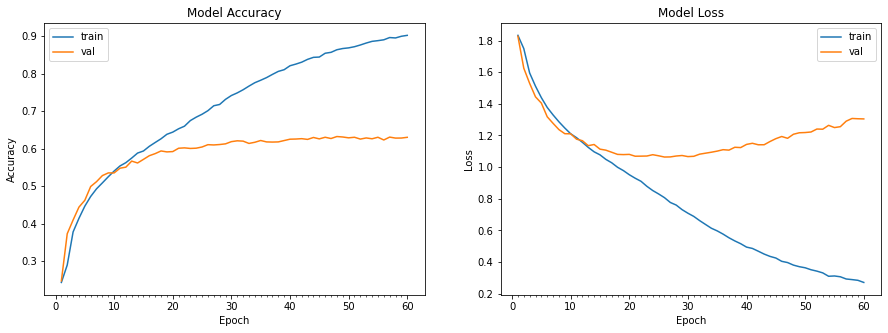

In [70]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001, decay=1e-6),metrics=['accuracy'])
model_info = model.fit_generator(train_generator,steps_per_epoch=num_train // batch_size,epochs=60,validation_data=validation_generator,validation_steps=num_val // batch_size)
plot_model(model_info)
model.save_weights('model.h5')